In [3]:
from gensim.models import Word2Vec, FastText
import pandas as pd
import re
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('Machines_word2vec.csv')

In [7]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dianu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
pip uninstall gensim

^C
Note: you may need to restart the kernel to use updated packages.


In [1]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNewsvectorsnegative300.bin', binary=True)

C:\Users\dianu\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [8]:
df.head()

,Topic,Citation,Implementation,Class
0,this condition needs a\nventilator that feeds ...,1,0,Ventilators
1,"See how the Dyson team, from nearly every func...",0,1,Ventilators
2,"ford to produce 50,000 ventilators in michigan...",0,1,Ventilators
3,Tesla engineers are building ventilators for c...,0,1,Ventilators
4,"A Wireless, Automatic Hand Wash Sensor and Tim...",0,1,Dispensors


In [9]:
topicers=df['Topic'].to_list()
citers=df['Citation'].to_list()
implementations=df['Implementation'].to_list()
classers=df['Class'].to_list()


In [10]:
import re

def extracter(lst):
    res = []
    for el in lst:
        el = re.sub('[1234567890\[\]\n.,—_-]', '', el)
        sub = word_tokenize(el)
        res.append(sub)
      
    return(res)

y=extracter(topicers)
# print(y[0])

In [11]:
indexer_ventilator=[]
indexer_dispensor=[]
indexer_simulator=[]
indexer_aerosol=[]
indexer_bed=[]
indexer_breathanalyzer=[]

cit_sum_v=0
cit_sum_d=0
cit_sum_s=0
cit_sum_a=0
cit_sum_b=0
cit_sum_br=0
imp_sum_v=0
imp_sum_d=0
imp_sum_s=0
imp_sum_a=0
imp_sum_b=0
imp_sum_br=0



labels=["Ventilators","Dispensors","Simulators","Aerosol Containers","Beds", "Breathanalyzers"]
for i in range(len(classers)):
  if classers[i]=="Ventilators":
    indexer_ventilator.append(i)
    cit_sum_v=cit_sum_v+citers[i]
    imp_sum_v=imp_sum_v+implementations[i]

  elif classers[i]=="Dispensors":
    indexer_dispensor.append(i)
    cit_sum_d=cit_sum_d+citers[i]
    imp_sum_d=imp_sum_d+implementations[i]

  elif classers[i]=="Simulators":
    indexer_simulator.append(i)
    cit_sum_s=cit_sum_s+citers[i]
    imp_sum_s=imp_sum_s+implementations[i]

  elif classers[i]=="Aerosol Containers":
    indexer_aerosol.append(i)
    cit_sum_a=cit_sum_a+citers[i]
    imp_sum_a=imp_sum_a+implementations[i]

  elif classers[i]=="Beds":
    indexer_bed.append(i)
    cit_sum_b=cit_sum_b+citers[i]
    imp_sum_b=imp_sum_b+implementations[i]

  elif classers[i]=="Breathanalyzers":
      indexer_breathanalyzer.append(i)
      cit_sum_br=cit_sum_br+citers[i]
      imp_sum_br=imp_sum_br+implementations[i]

freq_class=[len(indexer_ventilator),len(indexer_dispensor),len(indexer_simulator),len(indexer_aerosol),len(indexer_bed),len(indexer_breathanalyzer)]

cit_sum=[cit_sum_v,cit_sum_d,cit_sum_s,cit_sum_a,cit_sum_b,cit_sum_br]
imp_sum=[imp_sum_v,imp_sum_d,imp_sum_s,imp_sum_a,imp_sum_b,imp_sum_br]
print(freq_class)

[4, 2, 2, 2, 2, 3]


In [14]:
# train word2vec model
w2v = Word2Vec(y, min_count=1)
print(w2v.wv)
#Word2Vec(vocab=19, size=5, alpha=0.025)

In [20]:
# access vector for one word
print(w2v.wv['dispenser'])
print(w2v.wv.most_similar('aerosol', topn=5))

[ 9.6450560e-03 -9.9269650e-04 -6.9603436e-03 -2.0650367e-03
  6.1363974e-03  1.3932881e-03  1.5105047e-03  2.1617445e-03
  5.8040968e-03 -3.2613787e-03  9.3530491e-03  3.6969825e-03
  2.2722888e-03 -3.8904902e-03 -8.2924459e-03  6.9210911e-04
 -2.9812108e-03 -9.9233817e-03 -5.7400628e-03 -9.0182684e-03
  1.7752751e-03 -8.2332706e-03  4.7887778e-03  2.2587972e-03
  6.3005313e-03  3.2036880e-04  7.2094235e-03 -2.9976184e-03
 -2.0821183e-03 -2.4658961e-03 -9.5522851e-03  8.0670537e-03
 -8.8160075e-03  4.3891575e-03 -7.0944172e-04 -4.3257298e-03
  4.5634839e-03 -3.1298199e-03  1.1524226e-03  8.7427562e-03
  5.6844312e-03 -2.5125491e-03 -2.2453556e-03  2.0486864e-04
 -1.9920459e-03  4.6989392e-03  3.5642197e-03 -5.5505969e-03
  9.6030440e-03  3.0912866e-03  1.1981135e-03 -5.5192998e-03
 -5.9022112e-03  7.2522773e-03  1.8727835e-03 -1.6583985e-03
  6.8192659e-03  9.5466208e-03  6.1353259e-03 -8.6881751e-03
  6.8177828e-03  7.0018863e-04  3.0359840e-03 -1.0002538e-03
 -3.9095281e-05 -4.01304

In [23]:
X1= w2v.wv['ventilators']
X2= w2v.wv['dispenser']
X3= w2v.wv['Neuromuscular']
X4= w2v.wv['aerosol']
X5= w2v.wv['bed']
X6= w2v.wv['breath']
X=np.stack([X1,X2,X3,X4,X5,X6], axis=0)
pca = PCA(n_components=3)
result = pca.fit_transform(X)

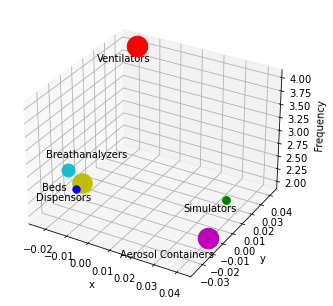

In [64]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import rand
from pylab import figure


fig = figure()
ax = Axes3D(fig)

algebra=[x + np.exp(y) for x, y in zip(cit_sum, imp_sum)]
scalar=[x  for x in algebra]

coly=['r','b','g','m','y','#17becf']
for i in range(6): #plot each point + it's index as text above
    if i==5:
     ax.scatter(result[i, 0],result[i, 1],freq_class[i],s=20*scalar[i],color=coly[i])
     ax.text(result[i, 0]-0.01,result[i, 1],freq_class[i]+0.1,  '%s' % (labels[i]), size=10, zorder=1,
     color='k')

    elif i==4:
        ax.scatter(result[i, 0],result[i, 1],freq_class[i],s=20*scalar[i],color=coly[i])
        ax.text(result[i, 0]-0.02,result[i, 1],freq_class[i]-0.4,  '%s' % (labels[i]), size=10, zorder=1,
                color='k')
    elif i==3:
        ax.scatter(result[i, 0],result[i, 1],freq_class[i],s=20*scalar[i],color=coly[i])
        ax.text(result[i, 0]-0.03,result[i, 1]-0.02,freq_class[i]-0.4,  '%s' % (labels[i]), size=10, zorder=1,
                color='k')
    else:
        ax.scatter(result[i, 0],result[i, 1],freq_class[i],s=20*scalar[i],color=coly[i])
        ax.text(result[i, 0]-0.02,result[i, 1],freq_class[i]-0.5,  '%s' % (labels[i]), size=10, zorder=1,
                color='k')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Frequency')
pyplot.show()
fig.savefig('Machines.jpg', dpi=1000)